# Automated Hyperparameter Tuning 
from Kaggle https://www.kaggle.com/pavansanagapati/automated-hyperparameter-tuning/notebook

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Automated-Hyperparameter-Tuning" data-toc-modified-id="Automated-Hyperparameter-Tuning-1">Automated Hyperparameter Tuning</a></span></li><li><span><a href="#1.-Manual-Search--" data-toc-modified-id="1.-Manual-Search---2">1. Manual Search <a id="1"></a> <br></a></span><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#manual1-결과" data-toc-modified-id="manual1-결과-2.0.1">manual1 결과</a></span></li><li><span><a href="#manual2-결과" data-toc-modified-id="manual2-결과-2.0.2">manual2 결과</a></span></li></ul></li></ul></li><li><span><a href="#2.-Grid-Search--" data-toc-modified-id="2.-Grid-Search---3">2. Grid Search <a id="2"></a> <br></a></span><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#grid-결과" data-toc-modified-id="grid-결과-3.0.1">grid 결과</a></span></li></ul></li></ul></li><li><span><a href="#3.-Random-Search--" data-toc-modified-id="3.-Random-Search---4">3. Random Search <a id="3"></a> <br></a></span><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#random-결과" data-toc-modified-id="random-결과-4.0.1">random 결과</a></span></li></ul></li></ul></li><li><span><a href="#4.-Bayesian-Optimization-using-HyperOpt--" data-toc-modified-id="4.-Bayesian-Optimization-using-HyperOpt---5">4. Bayesian Optimization using HyperOpt <a id="4"></a> <br></a></span><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#HyperOpt-결과" data-toc-modified-id="HyperOpt-결과-5.0.1">HyperOpt 결과</a></span></li></ul></li></ul></li><li><span><a href="#5.Optuna--" data-toc-modified-id="5.Optuna---6">5.Optuna <a id="5"></a> <br></a></span><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Optuna-결과" data-toc-modified-id="Optuna-결과-6.0.1">Optuna 결과</a></span></li></ul></li></ul></li></ul></div>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
# f
df = pd.read_csv("/content/drive/MyDrive/ybigta/교육세션/하이퍼파라미터 튜닝/creditcard.csv", na_values = '#NAME?')  

In [ ]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [ ]:
X = df[['V17', 'V9', 'V6', 'V12']]
Y = df['Class']

In [ ]:
X_Train, X_Test, Y_Train, Y_Test = train_test_split(X, Y, test_size = 0.30,random_state = 101)

# 1. Manual Search <a id="1"></a> <br>

< Manual Search ? >
- Choose some model hyperparameters based on our judgment/experience. 
- Then train the model, evaluate its accuracy and start the process again. This loop is repeated until a satisfactory accuracy is scored.

< 사용할 모델 >
- Random Forest Classifier 모델 이용하여 최적화
- About Random Forest models : large number of uncorrelated decision trees, which joint together constitute an ensemble. 
- In Random Forest, each decision tree makes its own prediction and the overall model output is selected to be the prediction which appeared most frequently.

- The main parameters used by a Random Forest Classifier are:

    * criterion = the function used to evaluate the quality of a split.
    * max_depth = maximum number of levels allowed in each tree.
    * max_features = maximum number of features considered when splitting a node.
    * min_samples_leaf = minimum number of samples which can be stored in a tree leaf.
    * min_samples_split = minimum number of samples necessary in a node to cause node splitting.
    * n_estimators = number of trees in the ensemble.

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

### manual1 

In [ ]:
#manual 1
#base model accuracy
manual1 = RandomForestClassifier(random_state= 101).fit(X_Train, Y_Train)

predictionforest = manual1.predict(X_Test)
print(confusion_matrix(Y_Test, predictionforest))
print(classification_report(Y_Test, predictionforest))

[[85289    10]
 [   34   110]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85299
           1       0.92      0.76      0.83       144

    accuracy                           1.00     85443
   macro avg       0.96      0.88      0.92     85443
weighted avg       1.00      1.00      1.00     85443



In [ ]:
man1_acc = accuracy_score(Y_Test,predictionforest)
man1_acc

0.9994850368081645

### manual2 

In [ ]:
#manual2
#'n_estimators=10' : 10 trees in the ensemble
manual2 = RandomForestClassifier(n_estimators=10, random_state= 101).fit(X_Train,Y_Train)

predictionforest2 = manual2.predict(X_Test)
print(confusion_matrix(Y_Test,predictionforest))
print(classification_report(Y_Test,predictionforest))

[[85289    10]
 [   34   110]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85299
           1       0.92      0.76      0.83       144

    accuracy                           1.00     85443
   macro avg       0.96      0.88      0.92     85443
weighted avg       1.00      1.00      1.00     85443



In [ ]:
man2_acc = accuracy_score(Y_Test,predictionforest2)
man2_acc

0.9993914071369217

# 2. Grid Search <a id="2"></a> <br>

< Grid Search ? >
- In Grid Search, 
1) set up a grid of hyperparameters -> 
2) train/test our model on each of the possible combinations. 
- In order to choose the parameters to use in Grid Search, take a look at which parameters worked best with Random Search, and form a grid based on them to see if we can find a better combination.
- Grid Search can be implemented in Python using scikit-learn GridSearchCV() function.

< CrossValidation >
- Using Cross-Validation when implementing Hyperparameters optimization can be really important. In this way, we might avoid using some Hyperparameters which works really good on the training data but not so good with the test data.

In [ ]:
from sklearn.model_selection import GridSearchCV

# Dictionary 형태로 파라미터 후보 설정
grid_search = {'criterion': ['entropy', 'gini'],
               'max_depth': [2, 6, 8],
               'max_features': ['auto', 'sqrt'],
               'min_samples_leaf': [4, 6, 8],
               'min_samples_split': [5, 7,10],
               'n_estimators': [10]}

clf = RandomForestClassifier()
grid = GridSearchCV(estimator = clf, param_grid = grid_search, 
                               cv = 2, verbose= 5, n_jobs = -1)
grid.fit(X_Train,Y_Train)

grid_pf = grid.best_estimator_.predict(X_Test)
print(confusion_matrix(Y_Test,grid_pf))
print(classification_report(Y_Test,grid_pf))

Fitting 2 folds for each of 108 candidates, totalling 216 fits
[[85286    13]
 [   37   107]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85299
           1       0.89      0.74      0.81       144

    accuracy                           1.00     85443
   macro avg       0.95      0.87      0.91     85443
weighted avg       1.00      1.00      1.00     85443



### grid 결과

In [ ]:
grid.best_params_

{'criterion': 'entropy',
 'max_depth': 8,
 'max_features': 'auto',
 'min_samples_leaf': 4,
 'min_samples_split': 5,
 'n_estimators': 10}

In [ ]:
grid_acc = accuracy_score(Y_Test,grid_pf)
grid_acc

0.9994148145547324

# 3. Random Search <a id="3"></a> <br>

< Random Search >
- In Random Search, we create a grid of hyperparameters and train/test our model on just some random combination of these hyperparameters. 

< Random Search vs. Grid Search >
- Grid Search is slower compared to Random Search but it can be overall more effective because it can go through the whole search space. 
- Instead, Random Search can be faster fast but might miss some important points in the search space.

In [ ]:
import numpy as np 
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import cross_val_score

random_search = {'criterion': ['entropy', 'gini'],
               'max_depth': [2],
               'max_features': ['auto', 'sqrt'],
               'min_samples_leaf': [4, 6, 8],
               'min_samples_split': [5, 7,10],
               'n_estimators': [20]}

clf = RandomForestClassifier()
random = RandomizedSearchCV(estimator = clf, param_distributions = random_search, n_iter = 10, 
                               cv = 4, verbose= 1, random_state= 101, n_jobs = -1)
random.fit(X_Train,Y_Train)

Fitting 4 folds for each of 10 candidates, totalling 40 fits


RandomizedSearchCV(cv=4, estimator=RandomForestClassifier(), n_jobs=-1,
                   param_distributions={'criterion': ['entropy', 'gini'],
                                        'max_depth': [2],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [4, 6, 8],
                                        'min_samples_split': [5, 7, 10],
                                        'n_estimators': [20]},
                   random_state=101, verbose=1)

### random 결과

In [ ]:
random_pf = random.best_estimator_.predict(X_Test)
print(confusion_matrix(Y_Test,random_pf))
print(classification_report(Y_Test,random_pf))
random_acc = accuracy_score(Y_Test,random_pf)

[[85282    17]
 [   51    93]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85299
           1       0.85      0.65      0.73       144

    accuracy                           1.00     85443
   macro avg       0.92      0.82      0.87     85443
weighted avg       1.00      1.00      1.00     85443



In [ ]:
random.best_params_

{'criterion': 'entropy',
 'max_depth': 2,
 'max_features': 'auto',
 'min_samples_leaf': 8,
 'min_samples_split': 7,
 'n_estimators': 20}

In [ ]:
random_acc

0.999204147794436

# 4. Bayesian Optimization using HyperOpt <a id="4"></a> <br>

Bayesian Optimization can be performed in Python using the Hyperopt library.  


In Hyperopt, Bayesian Optimization can be implemented giving 3 three main parameters to the function fmin().

* **Objective Function** = defines the loss function to minimize.
* **Domain Space** = defines the range of input values to test (in Bayesian Optimization this space creates a probability distribution for each of the used Hyperparameters).
* **Optimization Algorithm** = defines the search algorithm to use to select the best input values to use in each new iteration.

In [ ]:
!pip install hyperopt

In [ ]:
from hyperopt import hp, fmin, tpe, STATUS_OK, Trials

space = {'criterion': hp.choice('criterion', ['entropy', 'gini']),
        'max_depth': hp.quniform('max_depth', 10, 12, 10),
        'max_features': hp.choice('max_features', ['auto', 'sqrt','log2', None]),
        'min_samples_leaf': hp.uniform ('min_samples_leaf', 0, 0.5),
        'min_samples_split' : hp.uniform ('min_samples_split', 0, 1),
        'n_estimators' : hp.choice('n_estimators', [10, 50])
    }

def objective(space):
    hopt = RandomForestClassifier(criterion = space['criterion'], 
                                   max_depth = space['max_depth'],
                                 max_features = space['max_features'],
                                 min_samples_leaf = space['min_samples_leaf'],
                                 min_samples_split = space['min_samples_split'],
                                 n_estimators = space['n_estimators'], 
                                 )
    
    accuracy = cross_val_score(hopt, X_Train, Y_Train, cv = 4).mean()

    # We aim to maximize accuracy, therefore we return it as a negative value
    return {'loss': -accuracy, 'status': STATUS_OK }
    
trials = Trials()
best = fmin(fn= objective,
            space= space,
            algo= tpe.suggest,
            max_evals = 20,
            trials= trials)
best

100%|██████████| 20/20 [03:02<00:00,  9.11s/it, best loss: -0.9982544491482915]


{'criterion': 1,
 'max_depth': 10.0,
 'max_features': 0,
 'min_samples_leaf': 0.3717279885682011,
 'min_samples_split': 0.6208086651074141,
 'n_estimators': 0}

In [ ]:
crit = {0: 'entropy', 1: 'gini'}
feat = {0: 'auto', 1: 'sqrt', 2: 'log2', 3: None}
est = {0: 10, 1: 50, 2: 75, 3: 100, 4: 125}

trainedforest = RandomForestClassifier(criterion = crit[best['criterion']], 
                                       max_depth = best['max_depth'], 
                                       max_features = feat[best['max_features']], 
                                       min_samples_leaf = best['min_samples_leaf'], 
                                       min_samples_split = best['min_samples_split'], 
                                       n_estimators = est[best['n_estimators']]
                                      ).fit(X_Train,Y_Train)
hopt_pf = trainedforest.predict(X_Test)
print(confusion_matrix(Y_Test,hopt_pf))
print(classification_report(Y_Test,hopt_pf))
hopt_acc = accuracy_score(Y_Test,hopt_pf)

[[85299     0]
 [  144     0]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85299
           1       0.00      0.00      0.00       144

    accuracy                           1.00     85443
   macro avg       0.50      0.50      0.50     85443
weighted avg       1.00      1.00      1.00     85443



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### HyperOpt 결과

In [ ]:
hopt_acc

0.9983146659176293

# 5.Optuna <a id="5"></a> <br>

- 하이퍼파라미터 최적화 태스크를 자동화해주는 프레임워크
- 거의 모든 ML/DL 프레임워크에서 사용 가능
- 간단하고 빠름
- 최신 동향의 다양한 최적화 알고리즘
- 병렬 처리 가능
- 마찬가지로 하이퍼파라미터 튜닝 자동화 프레임워크인 HyperOpt와 비교했을 때 사용의 편리성, 시각화 가능 등의 장점으로 많이 쓰이고 있으며, 캐글에서도 많은 노트북에서 Optuna를 사용하고 있음을 확인할 수 있다.

< Process >
- 1) Define "objective" function
- 2) Use "trial" module to define
- 3) Make "study" and let optimize


< About "Trial" module >
- "Trial" module lets user to intuitively write code to get hyperparameters, instead of defining whole search space in advance.
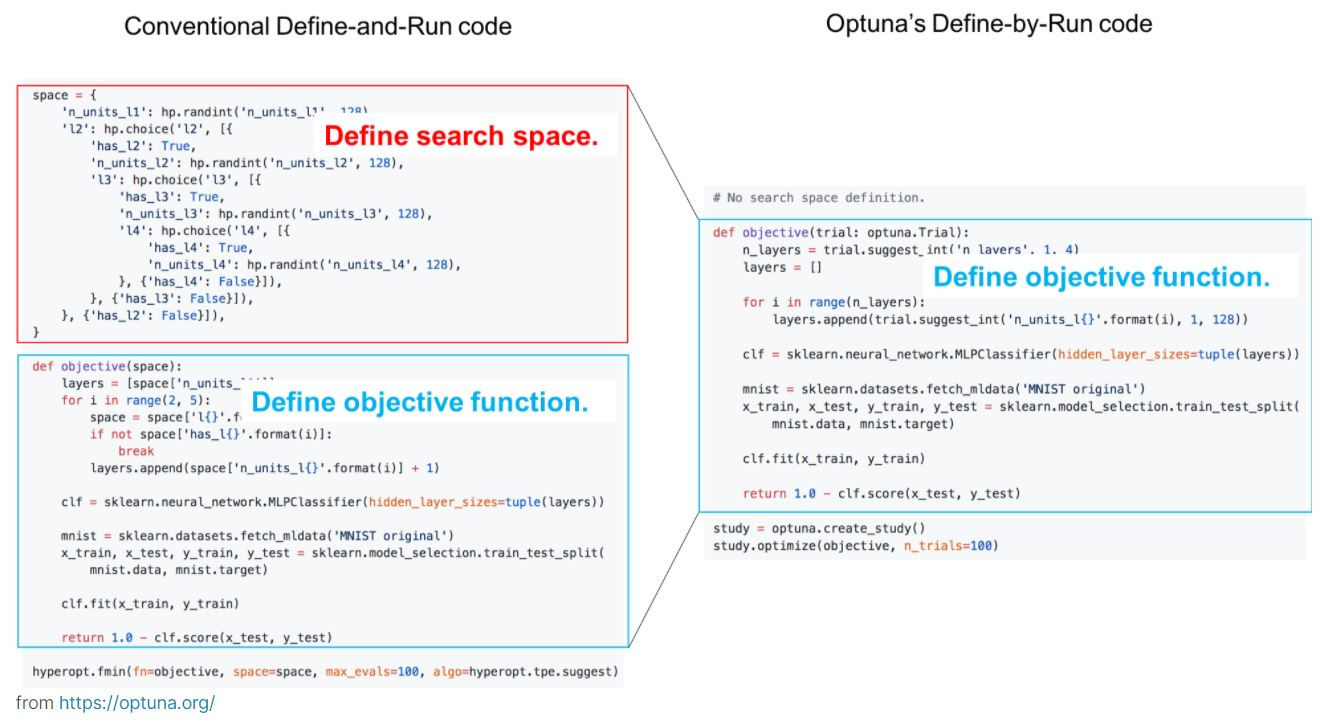

In [ ]:
!pip install optuna

     |████████████████████████████████| 308 kB 5.3 MB/s 
     |████████████████████████████████| 81 kB 7.6 MB/s 
     |████████████████████████████████| 210 kB 50.9 MB/s 
     |████████████████████████████████| 78 kB 5.6 MB/s 
     |████████████████████████████████| 113 kB 41.8 MB/s 
     |████████████████████████████████| 49 kB 5.1 MB/s 
     |████████████████████████████████| 150 kB 14.1 MB/s 
  Created wheel for pyperclip: filename=pyperclip-1.8.2-py3-none-any.whl size=11137 sha256=57e1df197eab3cf5b6307fca381d7f20577bee27a5062692366ba03a39158c49
  Stored in directory: /root/.cache/pip/wheels/9f/18/84/8f69f8b08169c7bae2dde6bd7daf0c19fca8c8e500ee620a28
Successfully built pyperclip


In [ ]:
import sklearn
import sklearn.datasets
import sklearn.ensemble
import sklearn.model_selection
import sklearn.svm
import optuna

# 1. 최소화/최대화할 목적함수 (objective function) 정의
# objective method needs to receive trial object as args, and return "score" to be optimized.
def objective(trial):
    iris = sklearn.datasets.load_iris()
    x, y = iris.data, iris.target

# 2. Use "trial" module to define hyperparameters dynamically
    classifier_name = trial.suggest_categorical('classifier', ['SVC', 'RandomForest'])

    #분류 모델이 SVC일 때
    if classifier_name == 'SVC':
        svc_c = trial.suggest_loguniform('svc_c', 1e-10, 1e10)
        classifier_obj = sklearn.svm.SVC(C=svc_c, gamma='auto')
    
    #분류모델이 랜덤포레스트일 때
    else:
        rf_max_depth = int(trial.suggest_loguniform('rf_max_depth', 2, 32))
        classifier_obj = sklearn.ensemble.RandomForestClassifier(max_depth=rf_max_depth, n_estimators=10)
    
    accuracy = cross_val_score(classifier_obj, x, y, cv = 4).mean()
    return accuracy


# 3. study 오브젝트 생성하고 목적함수 최적화
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=100)

[I 2022-04-01 08:16:51,218] A new study created in memory with name: no-name-ddc846b8-086b-49f4-b611-267fab78999f
[I 2022-04-01 08:16:51,252] Trial 0 finished with value: 0.9599928876244666 and parameters: {'classifier': 'SVC', 'svc_c': 0.19727108620006917}. Best is trial 0 with value: 0.9599928876244666.
[I 2022-04-01 08:16:51,369] Trial 1 finished with value: 0.9599928876244666 and parameters: {'classifier': 'RandomForest', 'rf_max_depth': 6.812700906095755}. Best is trial 0 with value: 0.9599928876244666.
[I 2022-04-01 08:16:51,383] Trial 2 finished with value: 0.9601706970128023 and parameters: {'classifier': 'SVC', 'svc_c': 15.989059325575909}. Best is trial 2 with value: 0.9601706970128023.
[I 2022-04-01 08:16:51,399] Trial 3 finished with value: 0.4822190611664296 and parameters: {'classifier': 'SVC', 'svc_c': 3.8425193341393716e-05}. Best is trial 2 with value: 0.9601706970128023.
[I 2022-04-01 08:16:51,416] Trial 4 finished with value: 0.653271692745377 and parameters: {'class

### Optuna 결과

In [ ]:
# 시행된 trial 중 최적의 하이퍼파라미터 반환하는 메소드
study.best_trial.params

{'classifier': 'SVC', 'svc_c': 8.934345417393974}

In [ ]:
# 시행된 trial 중 가장 높은 값 반환하는 메소드
optuna_acc = study.best_trial.value
optuna_acc

0.9735064011379801

In [ ]:
# 하이퍼파라미터별 중요도를 확인할 수 있는 그래프
optuna.visualization.plot_param_importances(study)


In [ ]:
# 하이퍼파라미터 최적화 과정을 확인
optuna.visualization.plot_optimization_history(study)